<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import math
import random
import matplotlib.pyplot as plt
from random import shuffle

In [48]:
x = [0.2,0.4,0.6,0.8]
y = [3.4,3.8,4.2,4.6]
data = list()
for i in range(4):
  data.append((x[i],y[i]))
print(data)
number_of_samples = 4
learning_rate = 0.1
m = -1
c = 1
epochs = 200
batch_size = 2
v_m = 0
v_c = 0
momentum_coefficient = 0.9
number_of_batches = number_of_samples//batch_size

[(0.2, 3.4), (0.4, 3.8), (0.6, 4.2), (0.8, 4.6)]


In [46]:
def gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))*d[i][0]
  return -1*sum/len(d)


In [43]:
def gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))
  return -1*sum/len(d)

In [44]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [49]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches):
    if j == number_of_batches:
      d = data[j*batch_size:]
    else:
      d = data[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient)

    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c

    m = m + v_m
    c = c + v_c
    
    error_list.append(error(d,m,c))
  random.shuffle(data)

print("optimal value of m, c :",m,c)

optimal value of m, c : 1.999999999581197 3.0000000002114846


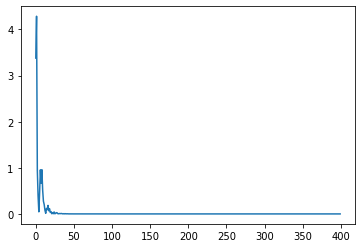

In [50]:
x_1 = range(200*(number_of_batches))
y_1 = error_list
plt.plot(x_1,y_1)

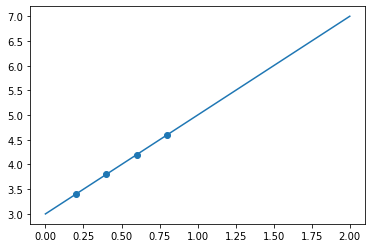

In [51]:
x_2 = range(0,3)
y_2 = [m*i+c for i in x_2]
plt.plot(x_2,y_2)
plt.scatter(x,y)